# Baseline Analysis

Here I make a niave guess: I take the median age and predict that for everyone. This serves as a baseline to compare all other analysis. If we have a method that does *worse* than this then it is not worthwhile. I look at the error metrics that we should consider in all other analysis: the mean squared error, the mean absolute error, a histogram of the errors, and the 25th and 75th percentile for the errors (this tells us that 50% of estimates are tighter thant those).

In [5]:
%pylab inline
import pandas as pd
from sklearn import preprocessing

Populating the interactive namespace from numpy and matplotlib


In [50]:
# Read in Data
train = pd.read_csv("TrainingSet.csv")
validation = pd.read_csv("ValidationSet.csv")
test = pd.read_csv("TestSet.csv")

In [51]:
# Make appropriate factors
le = preprocessing.LabelEncoder()
for df in train, test, validation:
    for var in ["education", 'pod', 'marital_status', 'race', 'hispanic']:
        le.fit(df[var])
        df[var] = le.transform(df[var])

In [57]:
# Only focus on age
train = train["age"]
validation = validation["age"]
test = test["age"]

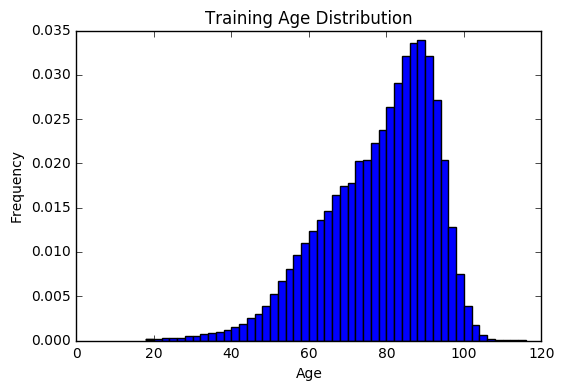

In [37]:
# New Training set with Train and Validation
btrain = pd.concat([train, validation])
plt.hist(btrain, normed=True, bins=49)
plt.title("Training Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

In [43]:
# Get median age of death to be our guess
guess = np.median(btrain)
print "Naive guess is:", guess

Naive guess is: 80.0


In [65]:
# Get the error metrics for this guess
mse = np.mean( (guess - test)**2 )
mae = np.mean( np.abs(guess - test) )
print "Naive MSE:", mse
print "Naive MAE:", mae

Naive MSE: 212.759692437
Naive MAE: 11.4092001957


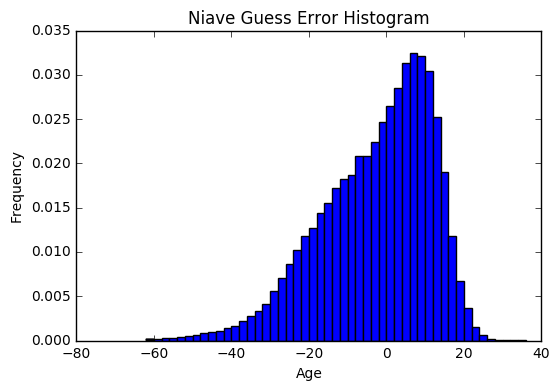

In [71]:
# Histogram of errors
plt.hist( (test- guess), bins=49, normed=True)
plt.title("Niave Guess Error Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

It should not be surprising, the above is just a translation of the origional age histogram (as I am just subracting the median).

In [74]:
# Get Error quantiles
print "25th Error Percentile:", np.percentile((test-guess), 25)
print "75th Error Percentile:", np.percentile((test-guess), 75)

25th Error Percentile: -12.0
75th Error Percentile: 8.0
